In [141]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels
import joblib


In [66]:
# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data exploration

In [117]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.listdir('/content/drive/My Drive/Colab Notebooks/data')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['data.csv']

In [118]:
# Path to the CSV file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/data/data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [120]:
# Get unique values
unique_values = df['primaryCategories'].unique()

print(unique_values)

['Health & Beauty' 'Electronics' 'Office Supplies'
 'Animals & Pet Supplies' 'Home & Garden' 'Electronics,Furniture'
 'Toys & Games,Electronics' 'Electronics,Media'
 'Office Supplies,Electronics']


In [121]:
data = df[["dateAdded", "primaryCategories", "reviews.username", "brand", "reviews.text", "reviews.title", "reviews.rating"]]


data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [122]:
# Concatenate
df['reviews.text'] = df['reviews.text'] + ' ' + df['reviews.title']

data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [123]:
df = pd.DataFrame(data)

# Convert the 'dateAdded' column to datetime format
df['dateAdded'] = pd.to_datetime(df['dateAdded'])

# Extract the year and create a new column 'year'
df['year'] = df['dateAdded'].dt.year

# Drop the 'dateAdded' column
df.drop(['dateAdded'], axis=1, inplace=True)

# # Display the resulting DataFrame
df.head()


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [124]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

primaryCategories    0
reviews.username     5
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


In [125]:
# Remove rows where 'reviews.username' is empty
data = data.dropna(subset=['reviews.username'])

# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

print (missing_values)
df.head()

dateAdded            0
primaryCategories    0
reviews.username     0
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
dtype: int64


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [126]:
# Get the value counts for the 'reviews.rating' column
rating_counts = df['reviews.rating'].value_counts()
print(rating_counts)

reviews.rating
5    19897
4     5648
3     1206
1      965
2      616
Name: count, dtype: int64


In [127]:
#Function to determine negative, neutral and positive
def review_sentiment(rating):
    if rating in [1, 2]:
       return "negative"
    elif rating in [3]:
       return "neutral"
    elif rating in [4, 5]:
       return "positive"
    else:
       return None

In [128]:

# Apply the reviews rating
df['reviews.sentiment'] = df['reviews.rating'].apply(review_sentiment)
df.head()



,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year,reviews.sentiment
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015,neutral
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015,positive
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015,positive
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015,positive
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015,positive


In [129]:
#consolidate into data variable

data = df[["year", "primaryCategories", "reviews.username", "brand", "reviews.text", "reviews.title", "reviews.rating", "reviews.sentiment"]]
data.head()

,year,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,reviews.sentiment
0,2015,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,neutral
1,2015,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,positive
2,2015,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,positive
3,2015,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,positive
4,2015,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,positive


# Cleaning, lemmatization and tokenization

In [87]:
# Define a function to clean text data
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters and punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove unnecessary whitespace
    return text

In [88]:
data['reviews.text'] = data['reviews.text'].apply(clean_text)

# Display the resulting DataFrame
data.head()

,year,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,reviews.sentiment
0,2015,Health & Beauty,Byger yang,Amazonbasics,i order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,neutral
1,2015,Health & Beauty,ByMG,Amazonbasics,bulk is always the le expensive way to go for ...,... always the less expensive way to go for pr...,4,positive
2,2015,Health & Beauty,BySharon Lambert,Amazonbasics,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,5,positive
3,2015,Health & Beauty,Bymark sexson,Amazonbasics,seem to work a well a name brand battery at a ...,... as well as name brand batteries at a much ...,5,positive
4,2015,Health & Beauty,Bylinda,Amazonbasics,these battery are very long lasting the price ...,... batteries are very long lasting the price ...,5,positive


In [89]:
# Tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()

In [90]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    return ' '.join(lemmatized_tokens)

# Apply tokenization and lemmatization
data['reviews.text'] = data['reviews.text'].apply(tokenize_and_lemmatize)

# Prepare testset

In [147]:
# Define features and target variable
X = data['reviews.text']
y = data['reviews.sentiment']

In [138]:
n = 300

print(X[n])
print(y[n])

rating_counts = y.value_counts()
print(rating_counts)

i thought i would give these aa battery a try i have always used kirkland brand and never had a problem these are a few cent cheaper i will see how long they last compared to kirkland brand costco
5
reviews.rating
5    19897
4     5648
3     1206
1      965
2      616
Name: count, dtype: int64


In [148]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [149]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model: Naive Bayes

In [150]:
# apply the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [151]:
# Evaluating the model
y_pred = nb_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

    negative       0.88      0.12      0.21       316
     neutral       0.00      0.00      0.00       241
    positive       0.91      1.00      0.95      5110

    accuracy                           0.91      5667
   macro avg       0.60      0.37      0.39      5667
weighted avg       0.87      0.91      0.87      5667

[[  38    0  278]
 [   3    0  238]
 [   2    0 5108]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


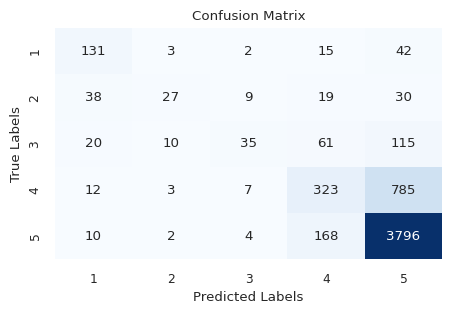

In [146]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = unique_labels(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.set(font_scale=0.8)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Grid search with cross-validation (ACTUALLY NOT REQUIRED FOR NAIVE BAYES)

In [107]:
# Build pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [108]:
# Define parameters for Grid Search
parameters = {
    'tfidf__max_features': [1000, 2000, 4000, 5000],
    'tfidf__ngram_range': [(1, 3)],  # unigrams and/or bigrams. increased to see impact
    'nb__alpha': [0.1, 0.5, 1.0, 2.0]
}

In [109]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 0.5, 1.0, 2.0],
                         'tfidf__max_features': [2000, 3000, 4000, 5000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

In [110]:
# Print the best parameters and best score found during grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Parameters: {'nb__alpha': 0.1, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Best Cross-validation Accuracy: 0.7640855945290095


In [143]:
# Get the best model (best estimator)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))


Accuracy: 0.76
              precision    recall  f1-score   support

           1       0.62      0.68      0.65       193
           2       0.60      0.22      0.32       123
           3       0.61      0.15      0.23       241
           4       0.55      0.29      0.38      1130
           5       0.80      0.95      0.87      3980

    accuracy                           0.76      5667
   macro avg       0.64      0.46      0.49      5667
weighted avg       0.73      0.76      0.72      5667



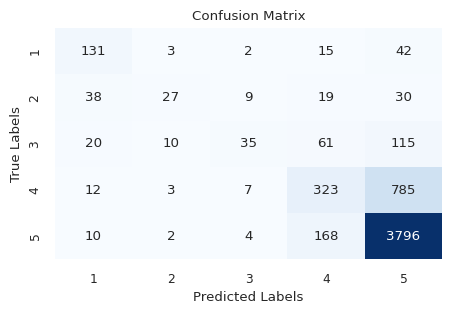

In [145]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = unique_labels(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.set(font_scale=0.8)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [139]:
def preprocess_text(text):
    # Clean and preprocess the input text
    cleaned_text = clean_text(text)
    lemmatized_text = tokenize_and_lemmatize(cleaned_text)
    return lemmatized_text

def predict_rating(input_text, model):
    # Preprocess the input text
    preprocessed_text = preprocess_text(input_text)

    # Use the model to predict the rating
    predicted_rating = model.predict([preprocessed_text])[0]

    return predicted_rating

# Example test prompt
test_text = "I really hated the product"
predicted_rating = predict_rating(test_text, best_model)

print(f"Predicted Rating: {predicted_rating}")

Predicted Rating: 5


In [ ]:
# Save the best model to a file
joblib.dump(best_model, 'best_model_logreg.pkl')

['best_model_logreg.pkl']